In [1]:
%matplotlib inline
import os
os.chdir('..')

In [2]:
import datajoint as dj
# dj.config['database.host'] = 'mesoscale-activity.datajoint.io'
dj.conn().connect()

Connecting root@127.0.0.1:3306


In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, tracking
from pipeline.plot import behavior_plot

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
experiment.Session & ephys.Unit

subject_id institution 6 digit animal ID,session session number,session_date,username,rig
435884,1,2018-12-07,daveliu,RRig


In [6]:
session_key = (experiment.Session & {'subject_id': 435884, 'session': 1}).fetch1('KEY')

In [7]:
session_key

{'subject_id': 435884, 'session': 1}

# Plot proportional 'correct' for one session

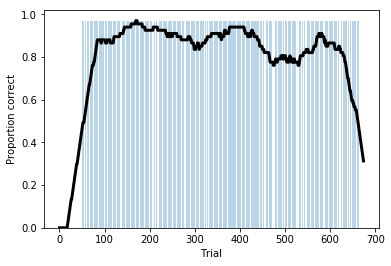

In [8]:
behavior_plot.plot_correct_proportion(session_key)

# Plot proportional 'correct' for one session, modulated by photostim

In [9]:
photostims = experiment.Photostim * experiment.BrainLocation

In [10]:
left_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="left"' & session_key).fetch1('KEY')
right_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="right"' & session_key).fetch1('KEY')
bi_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="both"' & session_key).fetch1('KEY')

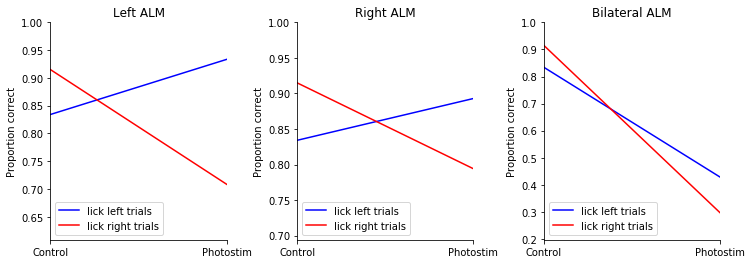

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(wspace=0.4)
behavior_plot.plot_photostim_effect(session_key, left_alm_photostim, axis=axs[0], title='Left ALM')
behavior_plot.plot_photostim_effect(session_key, right_alm_photostim, axis=axs[1], title='Right ALM')
behavior_plot.plot_photostim_effect(session_key, bi_alm_photostim, axis=axs[2], title='Bilateral ALM')

# Plot movement tracking with spiking overlay

In [12]:
units = (ephys.Unit & session_key & 'unit_quality = "good"').fetch('KEY')

In [13]:
unit_key = units[1]

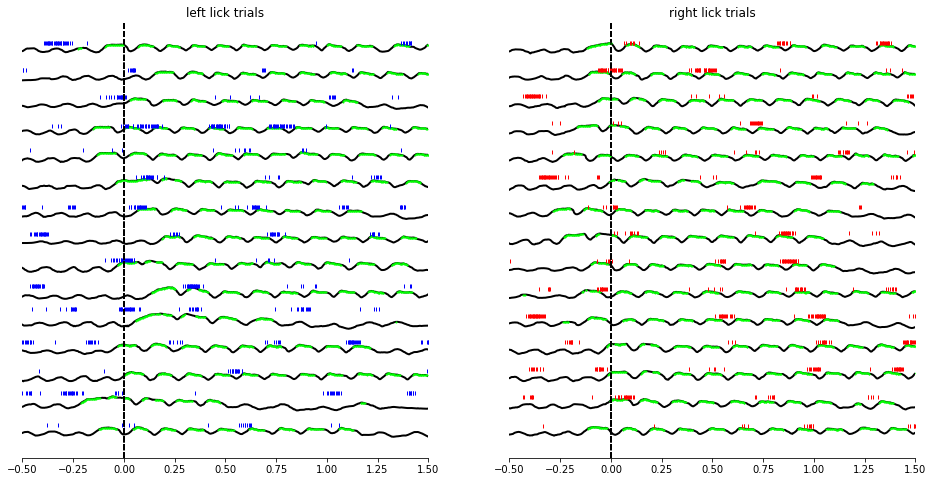

In [14]:
behavior_plot.plot_jaw_movement(session_key, unit_key, trial_limit=15)

# Plot single-trial jaw movement

In [15]:
trials = tracking.Tracking * experiment.BehaviorTrial & session_key & experiment.TrialEvent

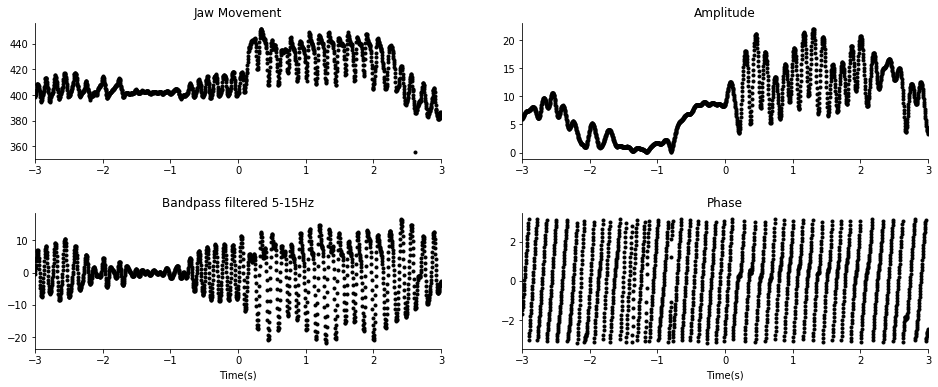

In [16]:
behavior_plot.plot_trial_jaw_movement((trials & f'trial = 205').fetch1('KEY'));

# Plot sliding-window phase distribution of jaw movement

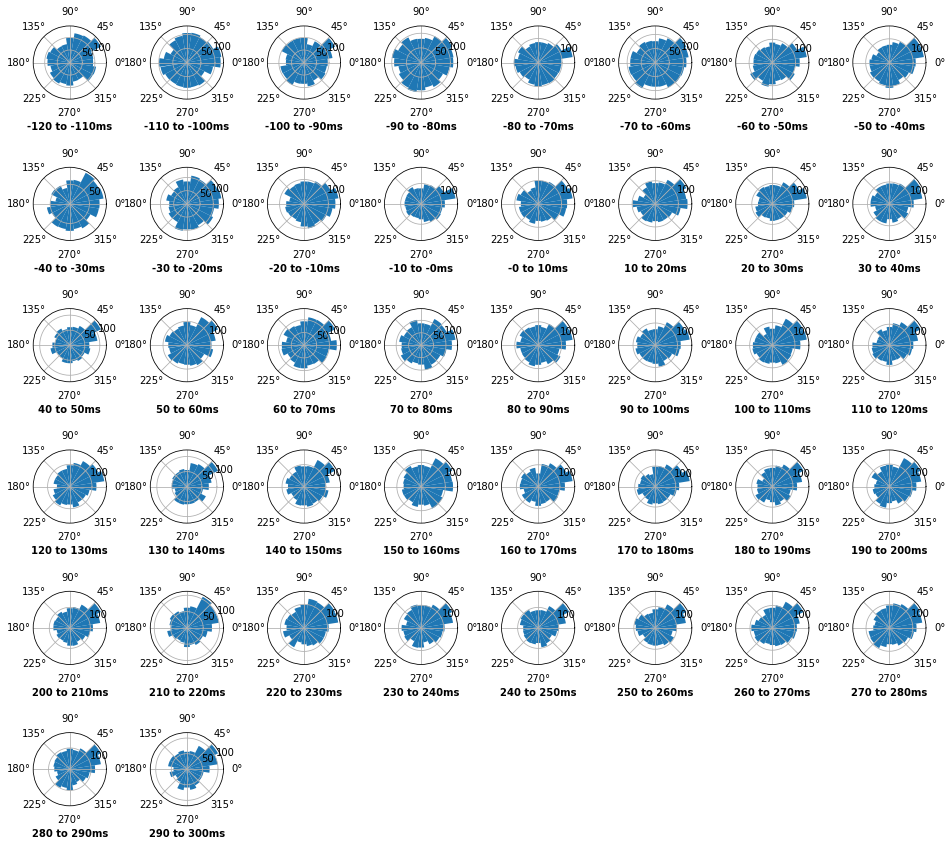

In [17]:
behavior_plot.plot_windowed_jaw_phase_dist(session_key, xlim=(-0.12, 0.3), w_size=0.01, bin_counts=20)

# Plot all phase distribution of jaw movement

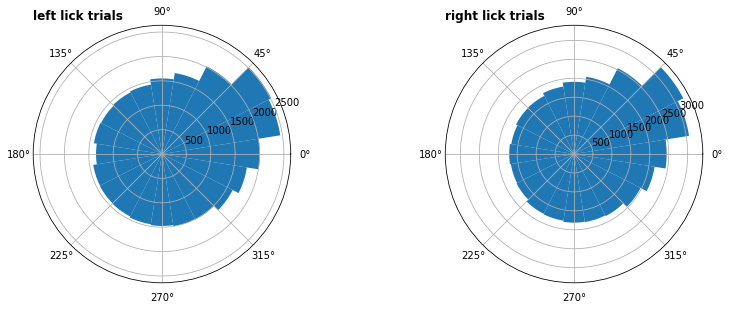

In [18]:
behavior_plot.plot_jaw_phase_dist(session_key, xlim=(-0.12, 0.3), bin_counts=20)

# =============================================

In [19]:
import importlib
importlib.reload(behavior_plot)

<module 'pipeline.plot.behavior_plot' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\MAP\\map-ephys\\pipeline\\plot\\behavior_plot.py'>